In [289]:
# Importing the necessary packages

import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

In [290]:
df1 = pd.read_csv('sparkling.csv',parse_dates=True,index_col='YearMonth')
df1.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [291]:
df1.tail()

,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


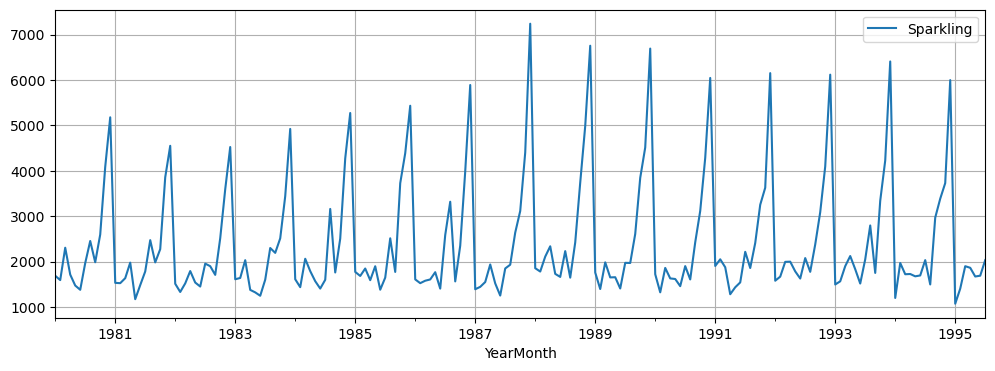

In [292]:
rcParams['figure.figsize'] = 12,4
df1.plot(grid=True);

In [293]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [294]:
nul_data = pd.isnull(df1['Sparkling'])
df1[nul_data]

,Sparkling
YearMonth,


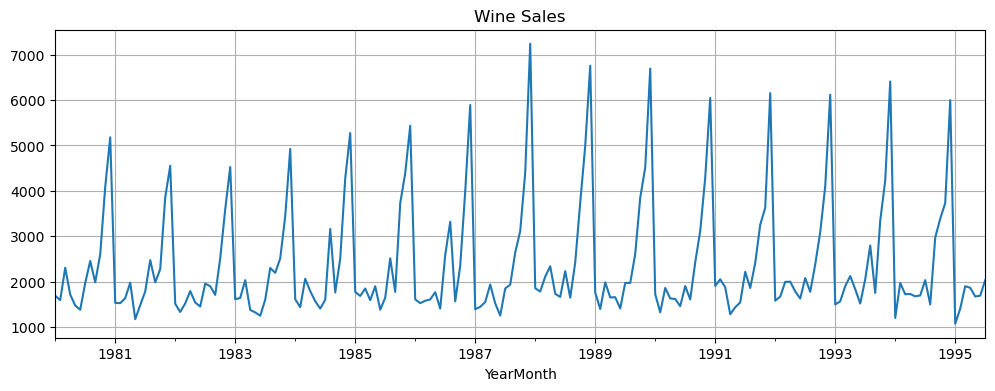

In [295]:

df1['Sparkling'].plot(grid=True,title = "Wine Sales");

In [296]:
df1['Year']=df1.index.year
df1['Month']=df1.index.month
df1.head()

,Sparkling,Year,Month
YearMonth,,,
1980-01-01,1686,1980,1
1980-02-01,1591,1980,2
1980-03-01,2304,1980,3
1980-04-01,1712,1980,4
1980-05-01,1471,1980,5


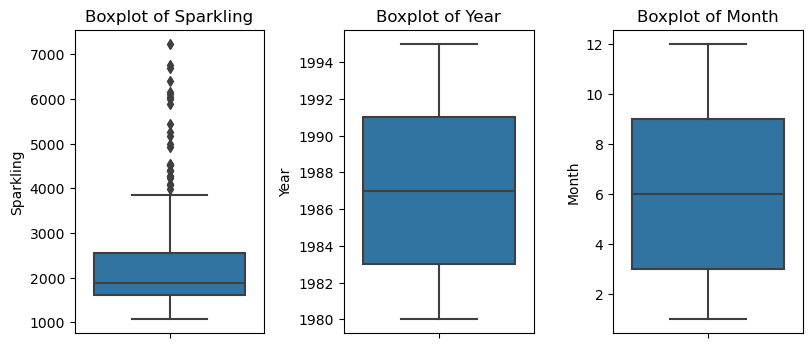

In [297]:
# boxplot
import seaborn as sns
dfbox=df1
plt.figure(figsize = (19,10))
feature_list = dfbox.columns
for i in range(len(feature_list)):
    plt.subplot(3, 7, i + 1)
    sns.boxplot(y = dfbox[feature_list[i]], data = dfbox)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

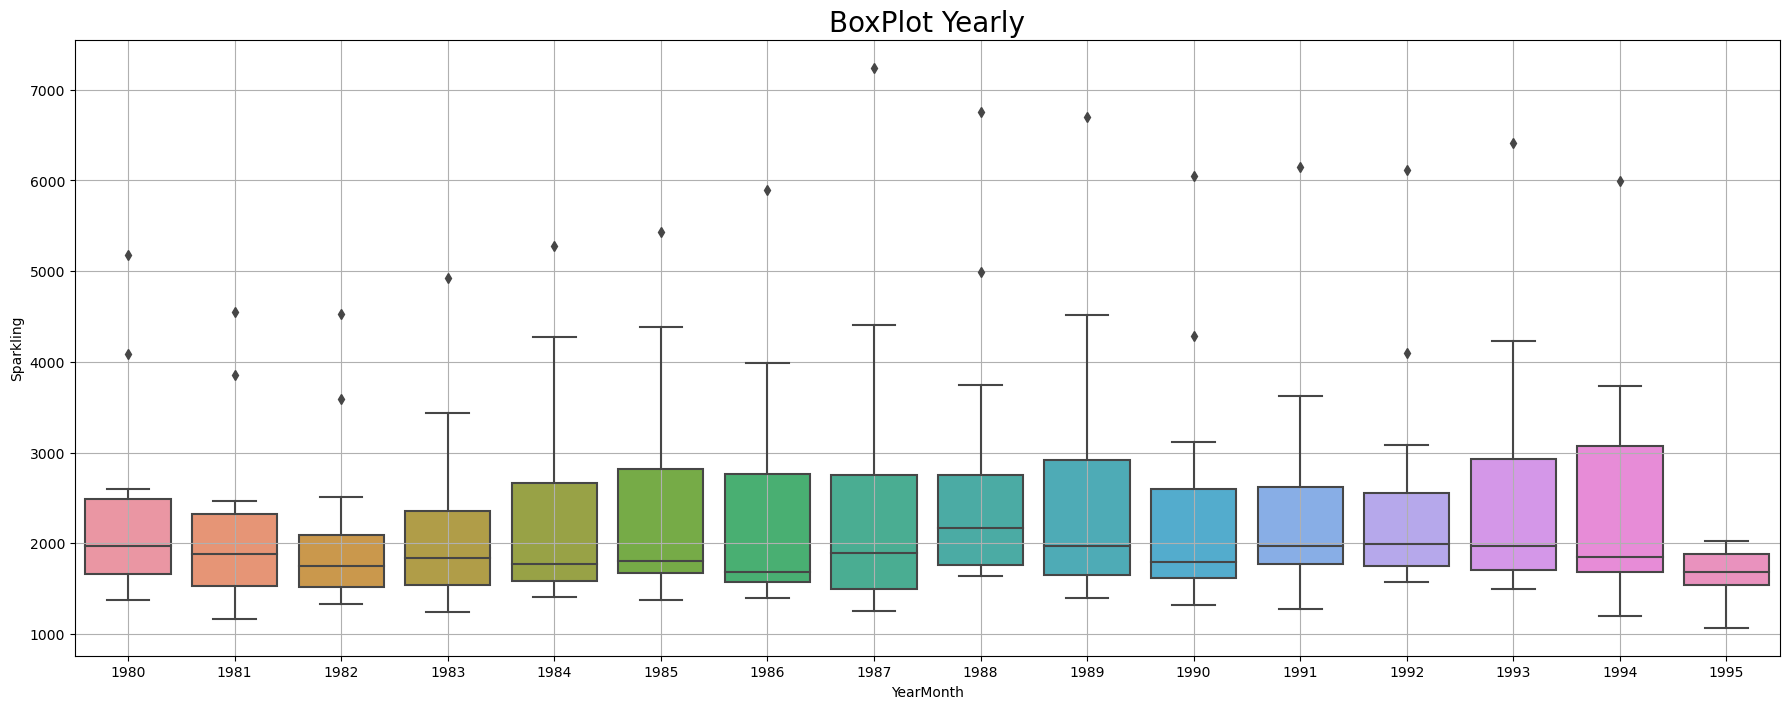

In [298]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df1.index.year,y = df1['Sparkling'],ax=ax)
plt.title("BoxPlot Yearly",fontsize = 20)
plt.grid();

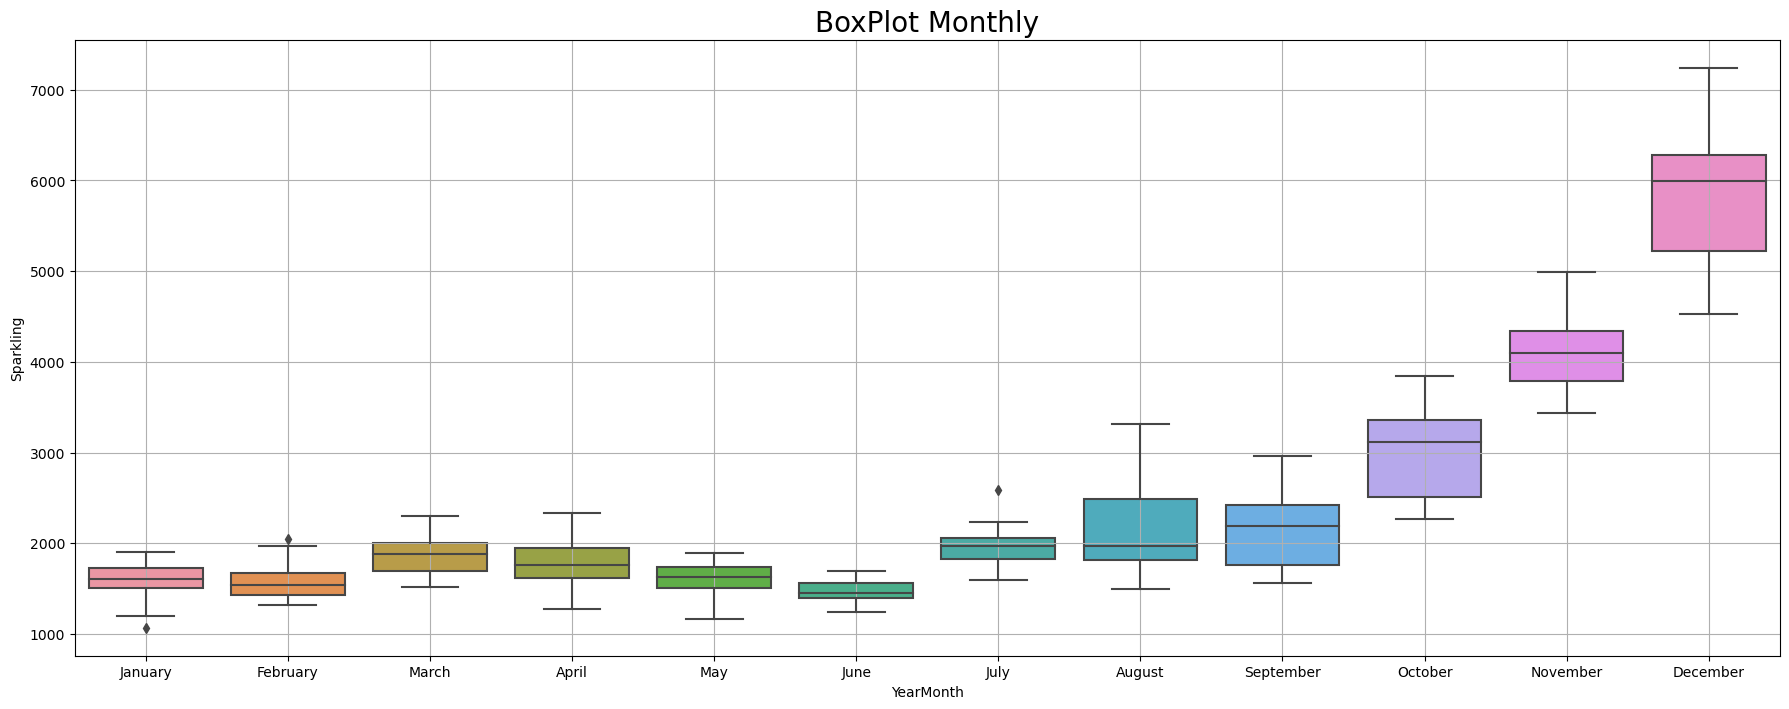

In [299]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df1.index.month_name(),y = df1['Sparkling'],ax=ax)
plt.title("BoxPlot Monthly",fontsize = 20)
plt.grid();

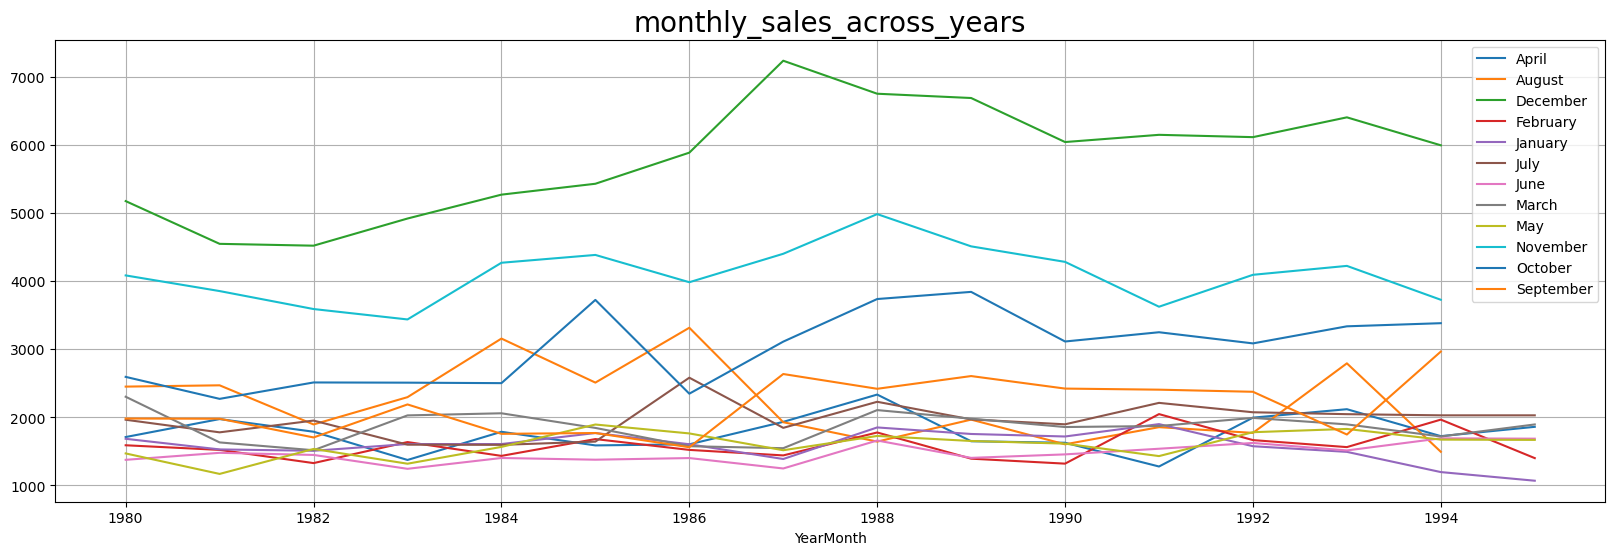

In [300]:
monthly_sales_across_years = pd.pivot_table(df1, values = 'Sparkling', columns = df1.index.month_name(), index = df1.index.year)
monthly_sales_across_years.plot(figsize=(20,6))
plt.grid()
plt.title("monthly_sales_across_years",fontsize = 20)
plt.legend(loc='best');

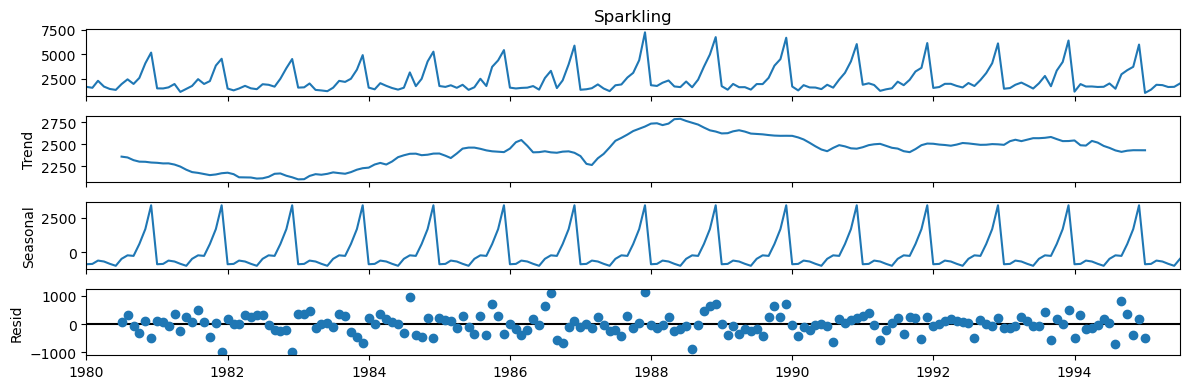

In [301]:
#Decompose the time series additively
df1_add_decompose = seasonal_decompose(df1['Sparkling'], model = 'additive',period=12)
df1_add_decompose.plot()
plt.show()

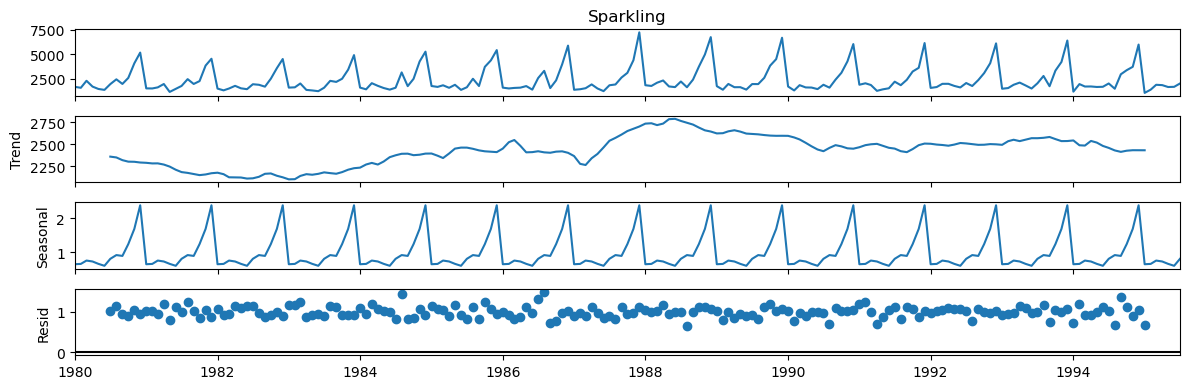

In [302]:
##Decompose the time series multiplicatively
df1_mul_decompose = seasonal_decompose(df1['Sparkling'], model = "multiplicative")
df1_mul_decompose.plot()
plt.show()

In [303]:
train    =   df1[0:int(len(df1['Sparkling'])*0.7)] 
test     =   df1[int(len(df1['Sparkling'])*0.7):]

In [304]:
print('Shape of datasets:')
print("train dataset: ",train.shape)
print("test dataset: ",test.shape,'\n')
print('Rows of dataset: ')
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

Shape of datasets:
train dataset:  (130, 3)
test dataset:  (57, 3) 

Rows of dataset: 
First few rows of Training Data 
             Sparkling  Year  Month
YearMonth                         
1980-01-01       1686  1980      1
1980-02-01       1591  1980      2
1980-03-01       2304  1980      3
1980-04-01       1712  1980      4
1980-05-01       1471  1980      5 

Last few rows of Training Data 
             Sparkling  Year  Month
YearMonth                         
1990-06-01       1457  1990      6
1990-07-01       1899  1990      7
1990-08-01       1605  1990      8
1990-09-01       2424  1990      9
1990-10-01       3116  1990     10 

First few rows of Test Data 
             Sparkling  Year  Month
YearMonth                         
1990-11-01       4286  1990     11
1990-12-01       6047  1990     12
1991-01-01       1902  1991      1
1991-02-01       2049  1991      2
1991-03-01       1874  1991      3 

Last few rows of Test Data 
             Sparkling  Year  Month
YearMonth  

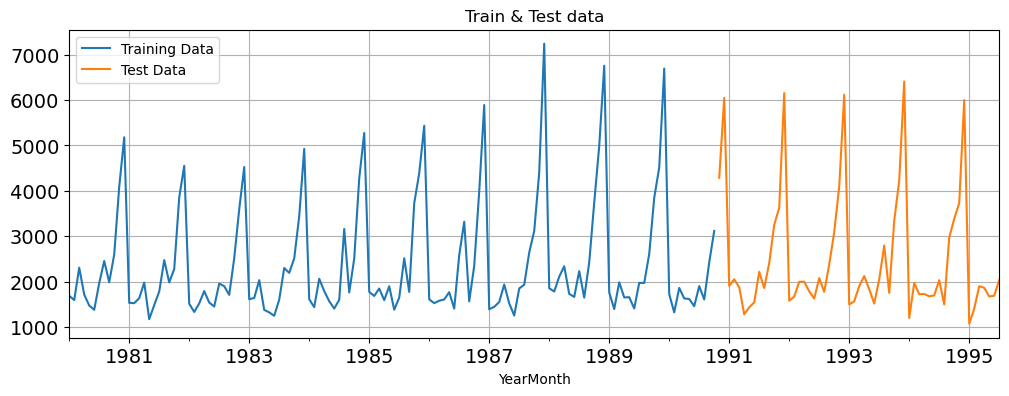

In [305]:
train['Sparkling'].plot(fontsize=14)
test['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title("Train & Test data")
plt.show()

In [306]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+256 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance 
 [256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312]


In [307]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

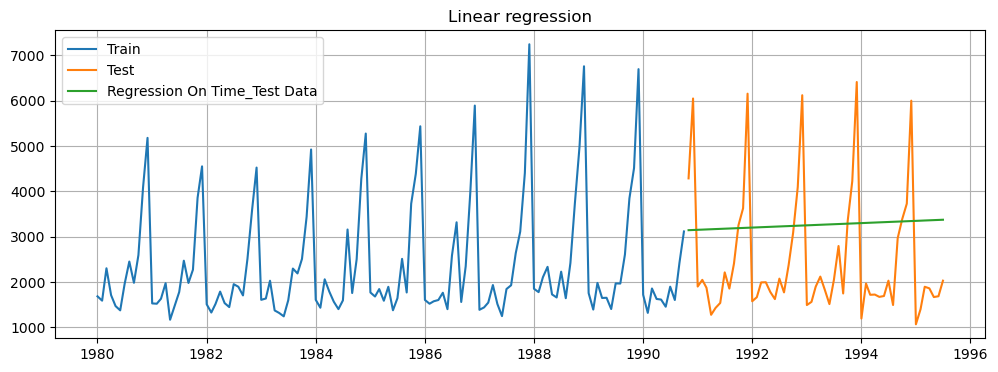

In [308]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.title("Linear regression")
plt.legend(loc='best')
plt.grid();

In [309]:
from sklearn import metrics
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1568.048 


In [310]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1568.048196


In [311]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,Year,Month,mean_forecast
YearMonth,,,,
1990-11-01,4286,1990,11,2361.276923
1990-12-01,6047,1990,12,2361.276923
1991-01-01,1902,1991,1,2361.276923
1991-02-01,2049,1991,2,2361.276923
1991-03-01,1874,1991,3,2361.276923


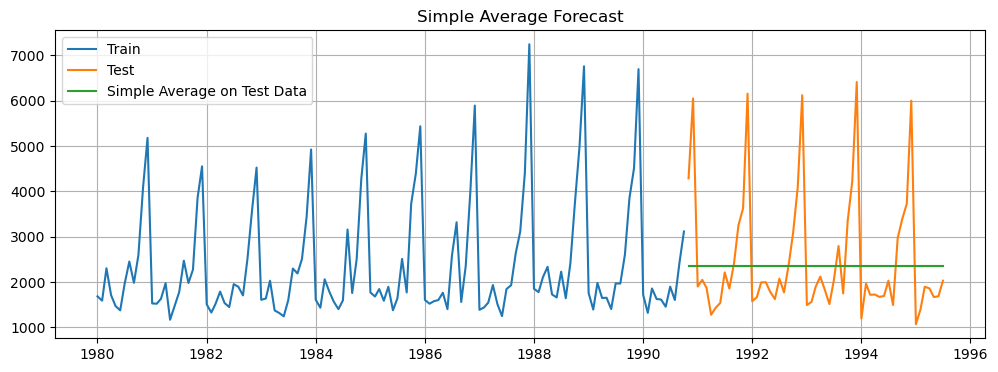

In [312]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [313]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1368.747


In [314]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1568.048196
SimpleAverageModel,1368.746717


In [315]:
MovingAverage = df1.copy()
MovingAverage.head()

,Sparkling,Year,Month
YearMonth,,,
1980-01-01,1686,1980,1
1980-02-01,1591,1980,2
1980-03-01,2304,1980,3
1980-04-01,1712,1980,4
1980-05-01,1471,1980,5


In [316]:

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.tail()

,Sparkling,Year,Month,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,,,
1995-03-01,1897,1995,3,1649.5,2592.00,2913.666667,2664.000000
1995-04-01,1862,1995,4,1879.5,1557.75,2659.833333,2645.222222
1995-05-01,1670,1995,5,1766.0,1707.75,2316.666667,2664.666667
1995-06-01,1688,1995,6,1679.0,1779.25,1598.166667,2522.444444
1995-07-01,2031,1995,7,1859.5,1812.75,1758.333333,2372.000000


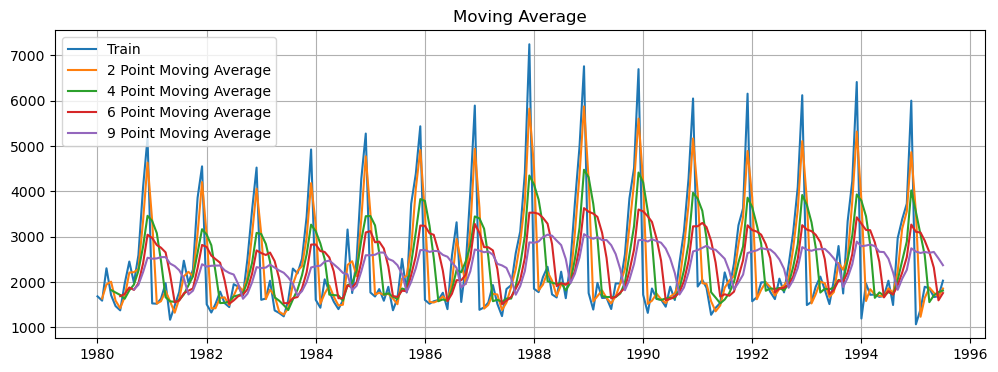

In [317]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.title('Moving Average')
plt.legend(loc = 'best')
plt.grid();

In [318]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

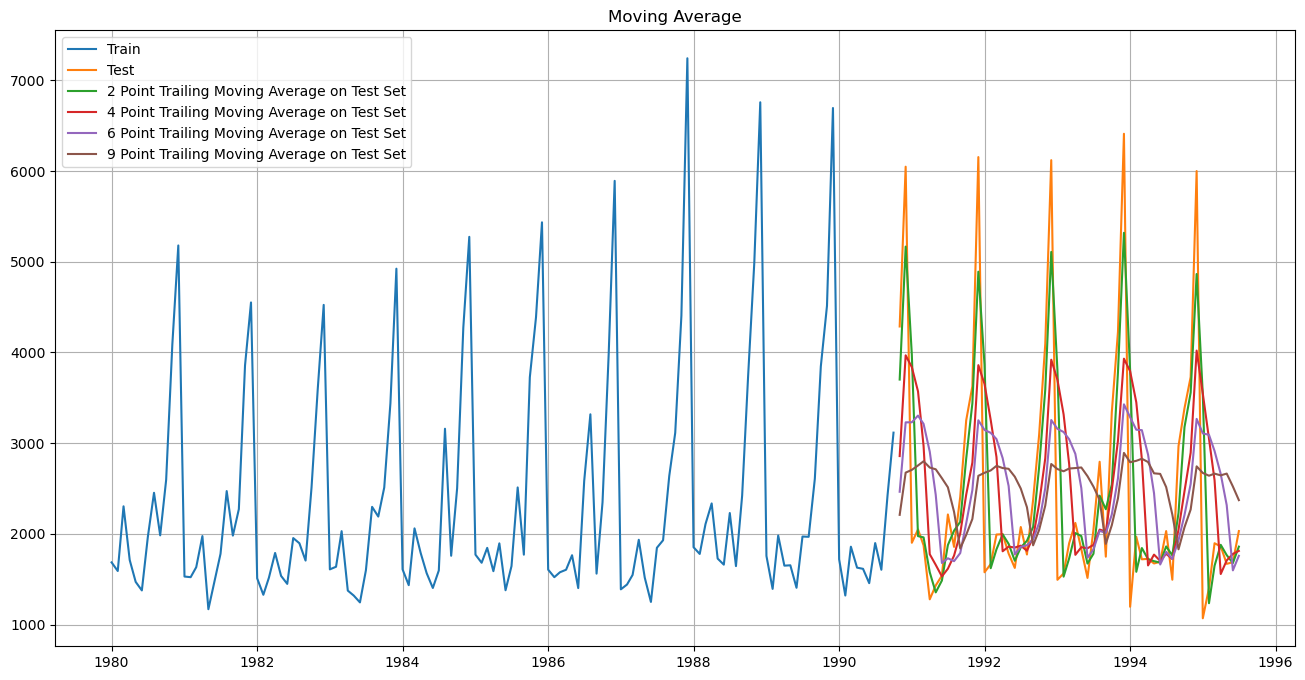

In [319]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.title('Moving Average')
plt.legend(loc = 'best')
plt.grid();

In [320]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 811.179
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1184.213
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1337.201
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1422.653


In [321]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,1568.048196
SimpleAverageModel,1368.746717
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281


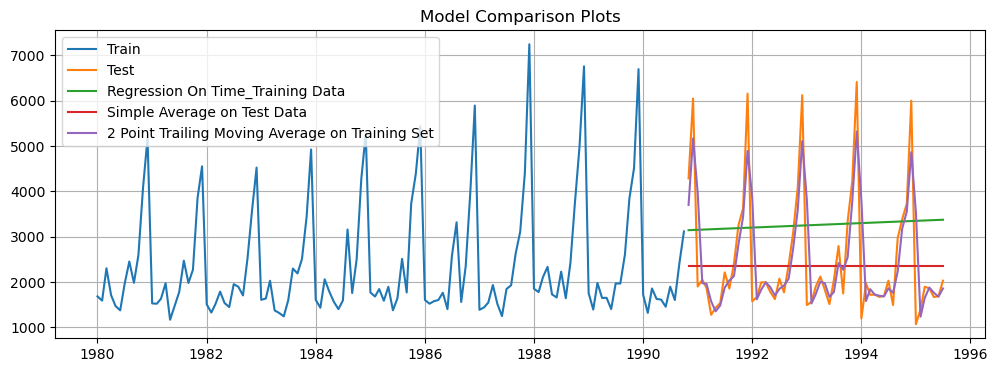

In [322]:
## Plotting on both Training and Test data

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')


plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [323]:
df1.drop(['Year','Month'],inplace=True, axis=1)

In [324]:
train    =   df1[0:int(len(df1)*0.7)] 
test     =   df1[int(len(df1)*0.7):]

In [325]:
train.head

<bound method NDFrame.head of             Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
...               ...
1990-06-01       1457
1990-07-01       1899
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116

[130 rows x 1 columns]>

In [326]:
# create class
model_SES = SimpleExpSmoothing(train['Sparkling'],initialization_method='estimated')
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

model_SES_autofit.params


{'smoothing_level': 0.04844277717441349,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2160.089750219884,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [327]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
##SES_predict = np.exp(SES_predict)
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test,SES_predict.values)[0])

SES RMSE: 1362.488304892539
SES RMSE (calculated using statsmodels): 1362.488304892539


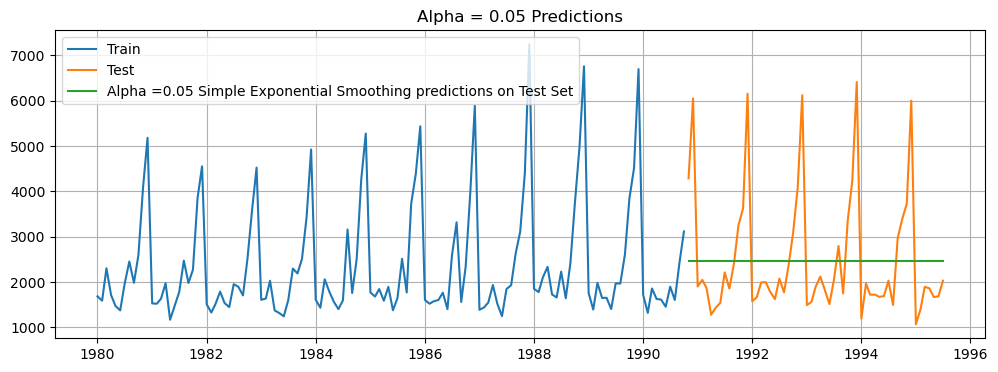

In [328]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_predict, label='Alpha =0.05 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.05 Predictions');

In [329]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.05,SES'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf


,Test RMSE
RegressionOnTime,1568.048196
SimpleAverageModel,1368.746717
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.05,SES",1362.488305


In [330]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07614001437835338, 'smoothing_trend': 0.07614001437835338, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1505.8019145976457, 'initial_trend': 2.7681085036744975, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [331]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))

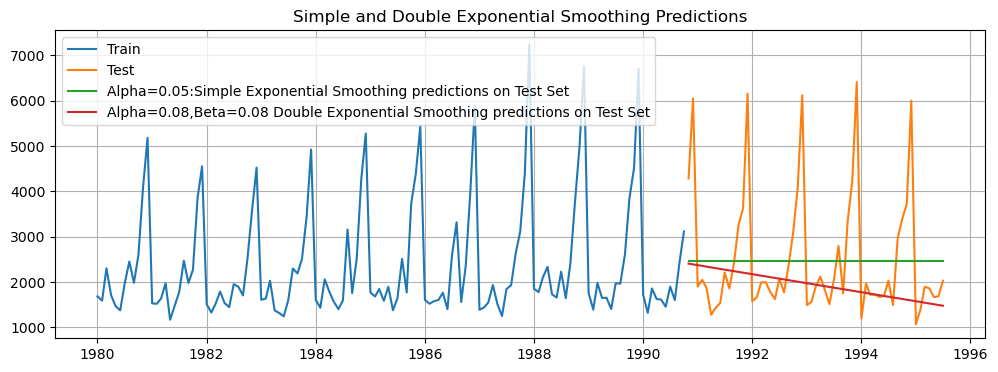

In [332]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.05:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.08,Beta=0.08 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [333]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 1472.2536402079227


In [334]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=0.08,Beta=0.08:DES'])
resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
RegressionOnTime,1568.048196
SimpleAverageModel,1368.746717
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.05,SES",1362.488305
"Alpha=0.08,Beta=0.08:DES",1472.253640


In [335]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()


print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.06836007770817487, 'smoothing_trend': 0.026396606894905476, 'smoothing_seasonal': 0.5278141355688852, 'damping_trend': nan, 'initial_level': 2320.59283142352, 'initial_trend': -0.20923379106809734, 'initial_seasons': array([-691.29424948, -766.19637996, -297.73559992, -515.60755042,
       -876.56975094, -881.13468478, -398.5167367 ,  125.78081283,
       -324.38738354,  241.56351726, 1666.23565064, 2681.03990549]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [336]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))

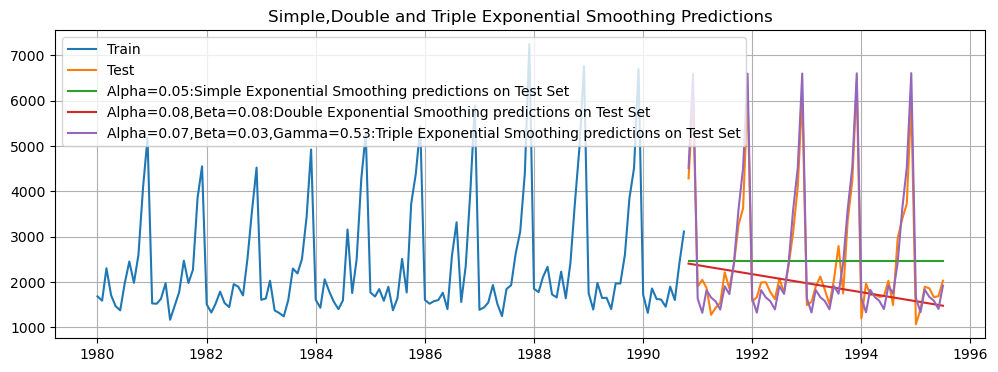

In [337]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.05:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.08,Beta=0.08:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.07,Beta=0.03,Gamma=0.53:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [338]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 377.45620019465565


In [339]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.07,Beta=0.03,Gamma=0.53:TES_ADD'])
resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
RegressionOnTime,1568.048196
SimpleAverageModel,1368.746717
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.05,SES",1362.488305
"Alpha=0.08,Beta=0.08:DES",1472.253640
"Alpha=0.07,Beta=0.03,Gamma=0.53:TES_ADD",377.456200


In [340]:
# Initializing the Triple Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='multiplicative',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07571458693711287, 'smoothing_trend': 0.06489822025317799, 'smoothing_seasonal': 0.3423280250182456, 'damping_trend': nan, 'initial_level': 2356.54181065557, 'initial_trend': 0.9987623998615819, 'initial_seasons': array([0.72639621, 0.69425932, 0.88623802, 0.802996  , 0.66503213,
       0.66312537, 0.86335952, 1.09763039, 0.89304493, 1.16812344,
       1.81009244, 2.3073598 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [341]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))

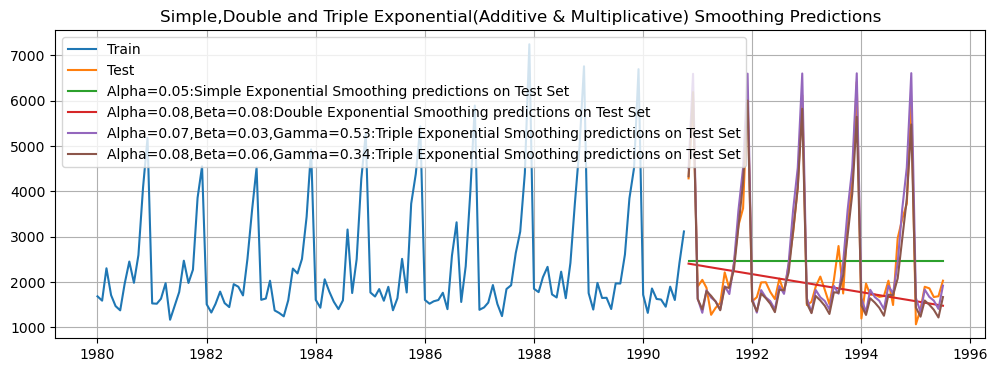

In [342]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.05:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.08,Beta=0.08:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.07,Beta=0.03,Gamma=0.53:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.08,Beta=0.06,Gamma=0.34:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential(Additive & Multiplicative) Smoothing Predictions');

In [343]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 362.9205568549566


In [344]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.08,Beta=0.06,Gamma=0.34:TES_Mul'])
resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

,Test RMSE
RegressionOnTime,1568.048196
SimpleAverageModel,1368.746717
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.05,SES",1362.488305
"Alpha=0.08,Beta=0.08:DES",1472.253640
"Alpha=0.07,Beta=0.03,Gamma=0.53:TES_ADD",377.456200
"Alpha=0.08,Beta=0.06,Gamma=0.34:TES_Mul",362.920557


The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

- H0
 : The Time Series has a unit root and is thus non-stationary.
- H1
 : The Time Series does not have a unit root and is thus stationary.
 
We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the α
 value.
 
We see that at 5% significant level the Time Series is non-stationary.

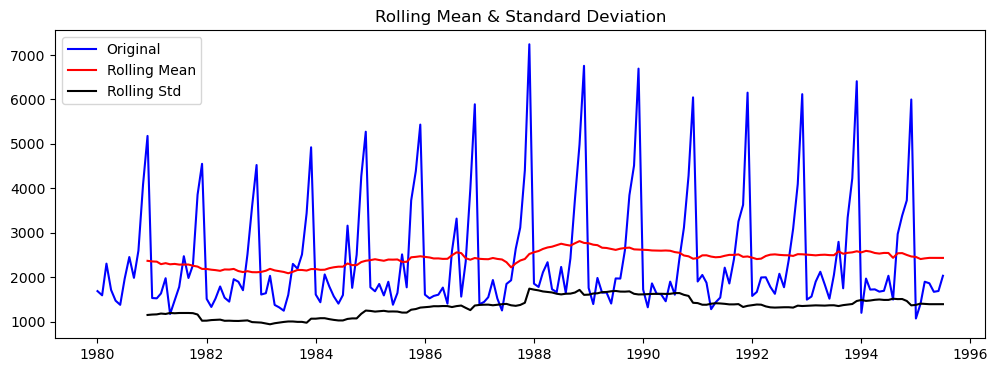

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [345]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=12).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
test_stationarity(df1)

the p-value 0.60 is very large, and not smaller than 0.05 and thus is not a stationary series.

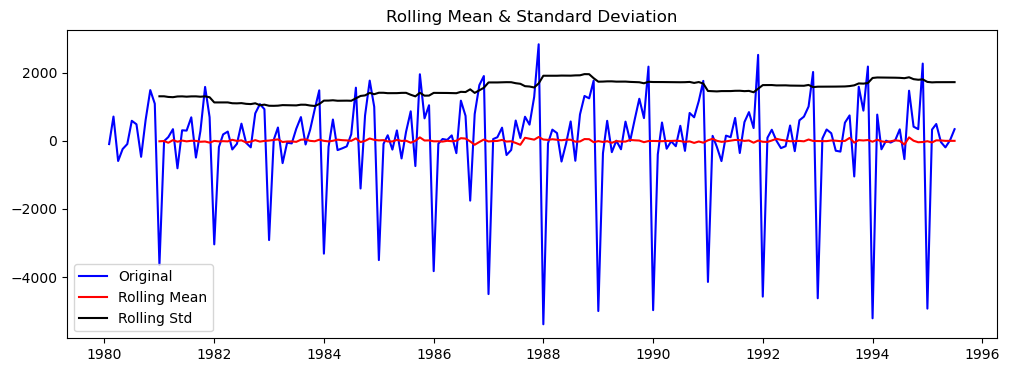

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [346]:
test_stationarity(df1.diff().dropna())

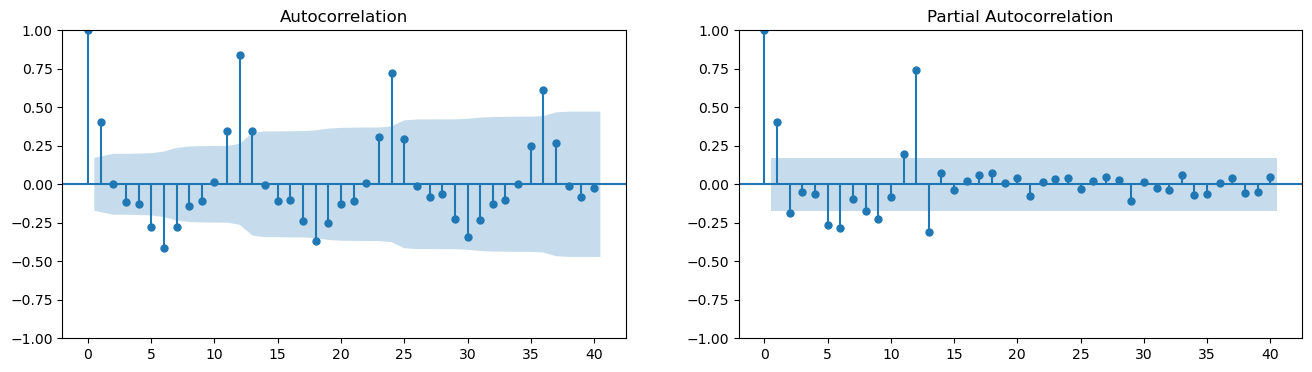

In [347]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plt.title('Original Data - ACF plot')
plot_acf(train, lags=40, ax=axes[0], alpha=0.05)  # ACF plot
plt.title('Original Data - PACF plot')
plot_pacf(train, lags=40, ax=axes[1], alpha=0.05)  # PACF plot

plt.show()


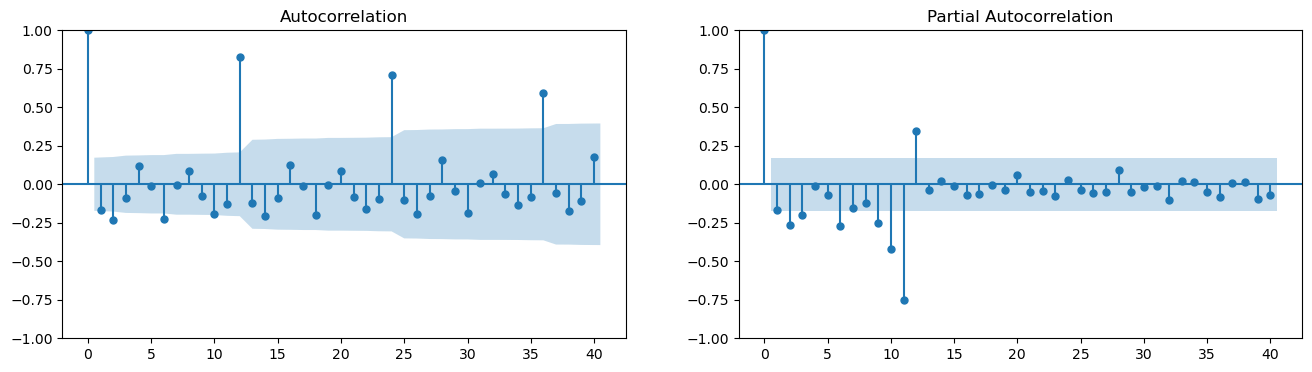

In [348]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(train.diff().dropna(), lags=40, ax=axes[0], alpha=0.05)  # ACF plot
plot_pacf(train.diff().dropna(), lags=40, ax=axes[1], alpha=0.05)  # PACF plot
plt.show()

In [349]:
from statsmodels.tsa.arima.model import ARIMA
manual_ARIMA = ARIMA(train, order=(3,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1089.814
Date:                Sun, 26 May 2024   AIC                           2191.628
Time:                        00:18:00   BIC                           2208.787
Sample:                    01-01-1980   HQIC                          2198.600
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4601      0.099     -4.658      0.000      -0.654      -0.267
ar.L2          0.3088      0.091      3.375      0.001       0.129       0.488
ar.L3         -0.2311      0.148     -1.566      0.1

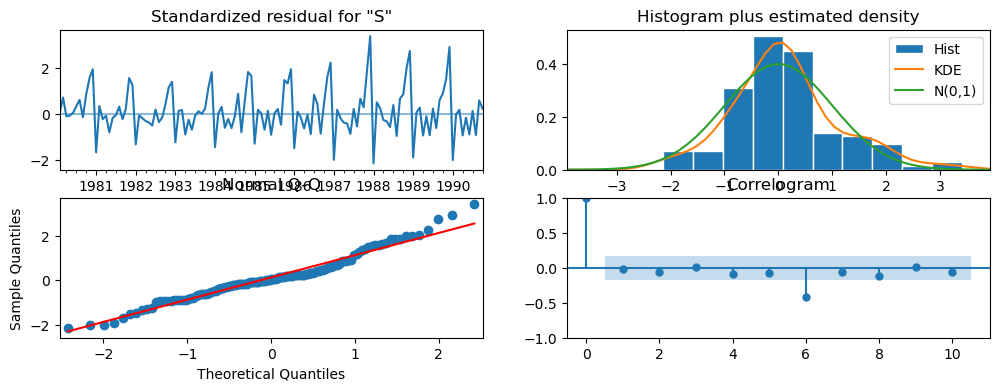

In [350]:
results_manual_ARIMA.plot_diagnostics();

In [351]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test,predicted_manual_ARIMA,squared=False)
print('RMSE:',rmse)

RMSE: 1341.1078442421078


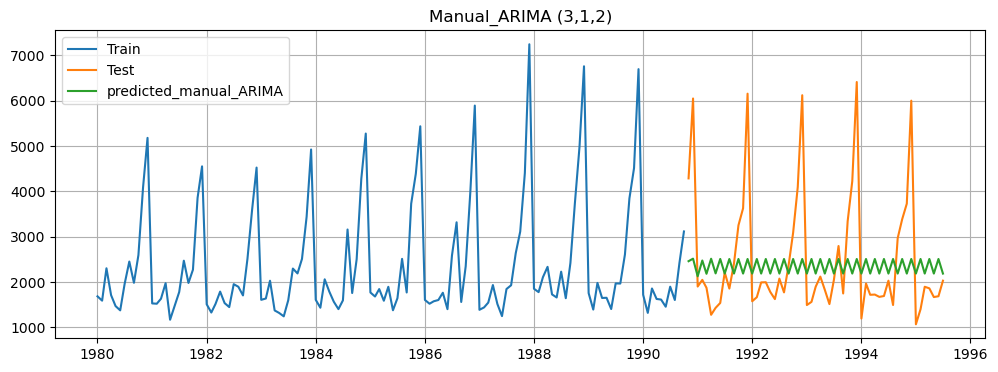

In [352]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(predicted_manual_ARIMA, label='predicted_manual_ARIMA')


plt.legend(loc='best')
plt.grid()
plt.title('Manual_ARIMA (3,1,2)');

In [353]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,predicted_manual_ARIMA,squared=False)]}
                           ,index=['Manual_ARIMA (3,1,2)'])
resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
RegressionOnTime,1568.048196
SimpleAverageModel,1368.746717
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.05,SES",1362.488305
"Alpha=0.08,Beta=0.08:DES",1472.253640
"Alpha=0.07,Beta=0.03,Gamma=0.53:TES_ADD",377.456200
"Alpha=0.08,Beta=0.06,Gamma=0.34:TES_Mul",362.920557


In [354]:

SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC


,param,seasonal,AIC


In [355]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train.values,
                                order=(3, 1, 2),
                                seasonal_order=(1, 1, 2, 12),
                                enforc1e_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(3, 1, 2)x(1, 1, 2, 12)   Log Likelihood                -866.285
Date:                            Sun, 26 May 2024   AIC                           1750.571
Time:                                    00:18:18   BIC                           1775.431
Sample:                                         0   HQIC                          1760.664
                                            - 130                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5841      0.274     -2.133      0.033      -1.121      -0.047
ar.L2          0.1420      0.130   

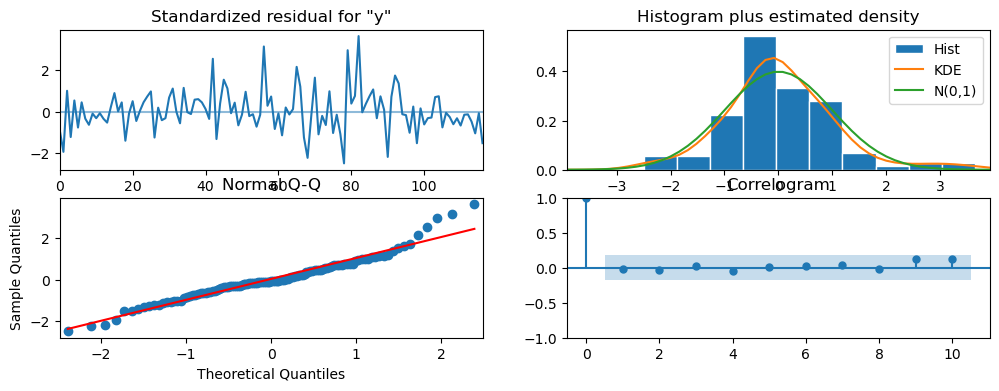

In [356]:
results_manual_SARIMA.plot_diagnostics();

In [357]:
predicted_manual_SARIMA = results_manual_SARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test,predicted_manual_SARIMA,squared=False)
print('RMSE:',rmse)

RMSE: 405.5054228074677


In [358]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,predicted_manual_SARIMA,squared=False)]}
                           ,index=['Manual_SARIMAX(3, 1, 2)x(1, 1, 2, 12)'])
resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
RegressionOnTime,1568.048196
SimpleAverageModel,1368.746717
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.05,SES",1362.488305
"Alpha=0.08,Beta=0.08:DES",1472.253640
"Alpha=0.07,Beta=0.03,Gamma=0.53:TES_ADD",377.456200
"Alpha=0.08,Beta=0.06,Gamma=0.34:TES_Mul",362.920557


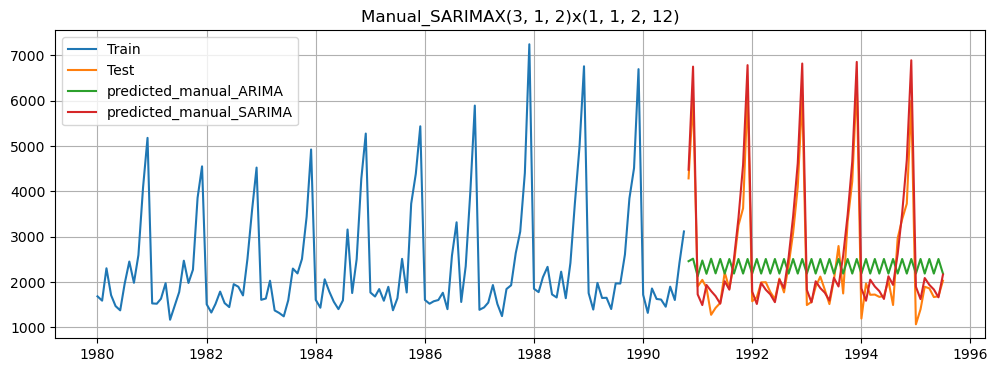

In [359]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')
forecast_index = test.index
plt.plot(predicted_manual_ARIMA, label='predicted_manual_ARIMA')
plt.plot(forecast_index,predicted_manual_SARIMA, label='predicted_manual_SARIMA')

plt.legend(loc='best')
plt.grid()
plt.title('Manual_SARIMAX(3, 1, 2)x(1, 1, 2, 12)');

In [360]:
import itertools
p = q = range(0, 4)
d= range(1,2) #since series is stationary at d=1
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [361]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [362]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train.values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2232.719438106631
ARIMA(0, 1, 1) - AIC:2217.9392270653407
ARIMA(0, 1, 2) - AIC:2194.034361361613
ARIMA(0, 1, 3) - AIC:2194.449267133353
ARIMA(1, 1, 0) - AIC:2231.1376630124582
ARIMA(1, 1, 1) - AIC:2196.0500859914123
ARIMA(1, 1, 2) - AIC:2194.9596533921367
ARIMA(1, 1, 3) - AIC:2195.9392405551043
ARIMA(2, 1, 0) - AIC:2223.89947027743
ARIMA(2, 1, 1) - AIC:2193.9749624367087
ARIMA(2, 1, 2) - AIC:2178.1097230317637
ARIMA(2, 1, 3) - AIC:2193.824213910353
ARIMA(3, 1, 0) - AIC:2220.460083761491
ARIMA(3, 1, 1) - AIC:2195.7403855340426
ARIMA(3, 1, 2) - AIC:2191.627911095623
ARIMA(3, 1, 3) - AIC:2182.815229448034


In [363]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
10,"(2, 1, 2)",2178.109723
15,"(3, 1, 3)",2182.815229
14,"(3, 1, 2)",2191.627911
11,"(2, 1, 3)",2193.824214
9,"(2, 1, 1)",2193.974962
2,"(0, 1, 2)",2194.034361
3,"(0, 1, 3)",2194.449267
6,"(1, 1, 2)",2194.959653
13,"(3, 1, 1)",2195.740386
7,"(1, 1, 3)",2195.939241


In [364]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1084.055
Date:                Sun, 26 May 2024   AIC                           2178.110
Time:                        00:18:35   BIC                           2192.409
Sample:                    01-01-1980   HQIC                          2183.920
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3020      0.046     28.543      0.000       1.213       1.391
ar.L2         -0.5360      0.079     -6.763      0.000      -0.691      -0.381
ma.L1         -1.9916      0.109    -18.213      0.0

In [365]:
# Prediction rsme
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

rmse = mean_squared_error(test, predicted_auto_ARIMA.tolist(), squared=False)
print(rmse)

1325.1666242809272


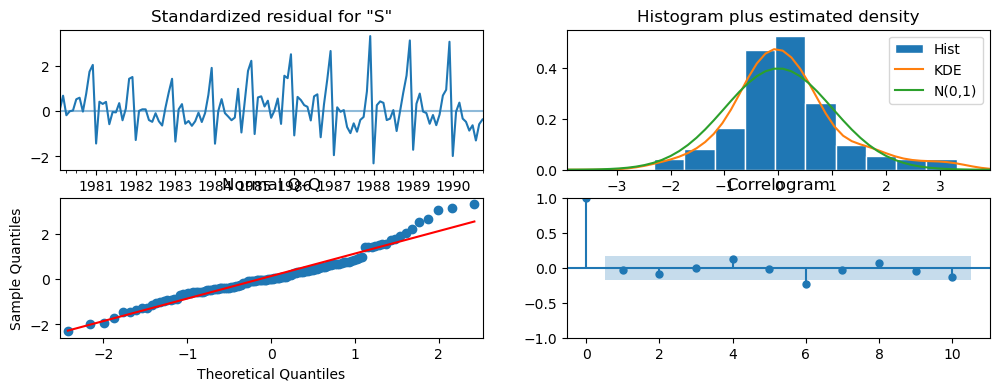

In [366]:
results_auto_ARIMA.plot_diagnostics()
plt.show()

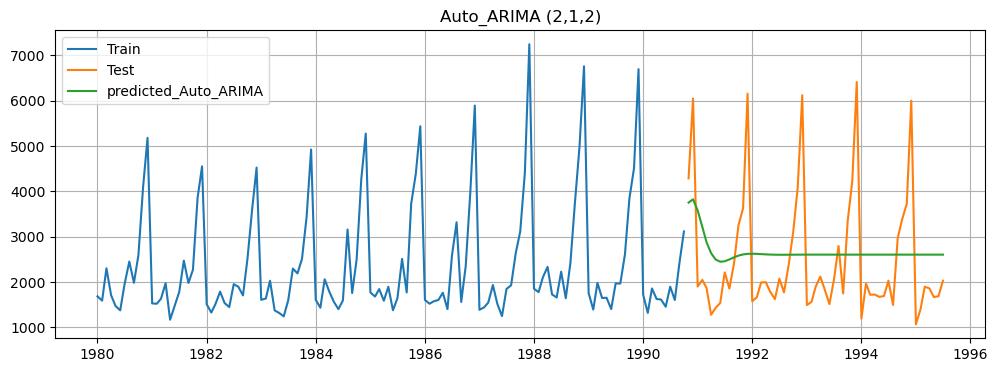

In [367]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')
forecast_index = test.index
plt.plot(predicted_auto_ARIMA, label='predicted_Auto_ARIMA')


plt.legend(loc='best')
plt.grid()
plt.title('Auto_ARIMA (2,1,2)');

In [368]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,predicted_auto_ARIMA,squared=False)]}
                           ,index=['Auto_ARIMA (2,1,2)'])
resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
RegressionOnTime,1568.048196
SimpleAverageModel,1368.746717
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.05,SES",1362.488305
"Alpha=0.08,Beta=0.08:DES",1472.253640
"Alpha=0.07,Beta=0.03,Gamma=0.53:TES_ADD",377.456200
"Alpha=0.08,Beta=0.06,Gamma=0.34:TES_Mul",362.920557


In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [82]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train.values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2216.4189020489616
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1921.5151801497761
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1691.5049017311667
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3467.2488830963816
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1807.295016166554
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1777.6492913875877
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1601.2815342105878
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3707.557913284176
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1618.9670228363277
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1617.7268547329663
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1602.0623659587434
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:2625.8931074345014
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1437.1055194983671
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1438.8202256825073
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1440.8380880553032
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3176.693675300695
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2193.281680181417
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1888.5868794008193
SARIMA(0, 1, 1

SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1538.3450973975278
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:2680.3112925049204
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1546.729069377408
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1538.7270471461668
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1538.2657006622396
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:2743.219656152532
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1367.4482131906307
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1367.08746148227
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1368.4868568111328
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:1694.3181459070136
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2140.669395981689
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1857.4627141045562
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1631.3963012943025
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3069.090861787325
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1727.5761549181684
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1691.867665037426
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1523.5249495960152
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3089.715237754568
SARIMA(2, 1, 2)x(2

In [96]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
253,"(3, 1, 3)","(3, 0, 1, 12)",1349.703005
236,"(3, 1, 2)","(3, 0, 0, 12)",1352.009215
237,"(3, 1, 2)","(3, 0, 1, 12)",1352.349090
221,"(3, 1, 1)","(3, 0, 1, 12)",1352.506964
220,"(3, 1, 1)","(3, 0, 0, 12)",1352.668051


In [369]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train.values,
                                order=(3, 1, 3),
                                seasonal_order=(3, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  130
Model:             SARIMAX(3, 1, 3)x(3, 0, [1], 12)   Log Likelihood                -663.852
Date:                              Sun, 26 May 2024   AIC                           1349.703
Time:                                      00:18:58   BIC                           1377.201
Sample:                                           0   HQIC                          1360.792
                                              - 130                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8049      0.124    -14.594      0.000      -2.047      -1.563
ar.L2         -1.00

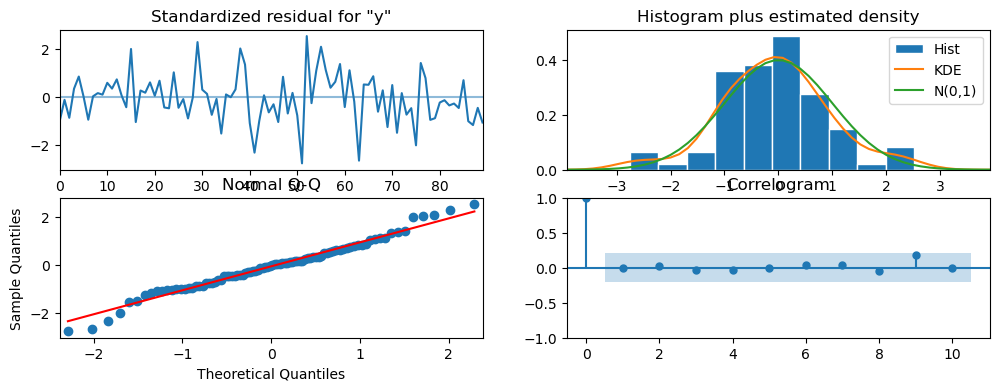

In [370]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [371]:
# Prediction rsme
predicted_auto_SARIMA = results_auto_SARIMA_6.forecast(steps=len(test))

rmse = mean_squared_error(test, predicted_auto_SARIMA.tolist(), squared=False)
print(rmse)

836.2211937554002


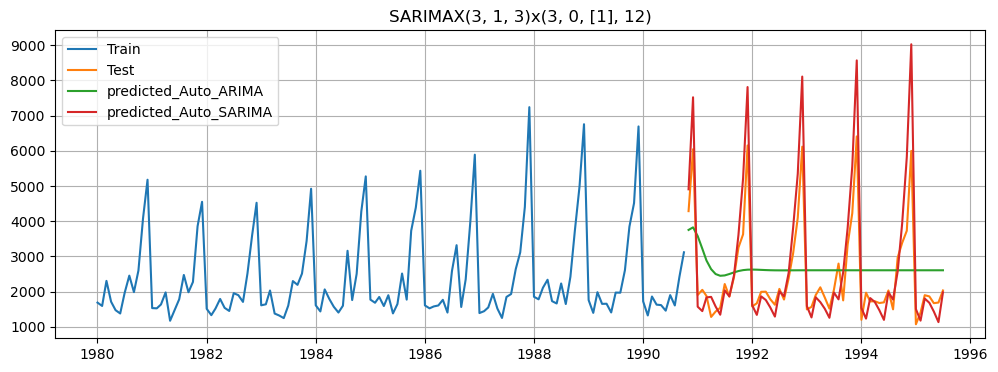

In [372]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')
forecast_index = test.index
plt.plot(predicted_auto_ARIMA, label='predicted_Auto_ARIMA')
plt.plot(forecast_index,predicted_auto_SARIMA, label='predicted_Auto_SARIMA')

plt.legend(loc='best')
plt.grid()
plt.title('SARIMAX(3, 1, 3)x(3, 0, [1], 12)');

In [373]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,predicted_auto_SARIMA,squared=False)]}
                           ,index=['SARIMAX(3, 1, 3)x(3, 0, [1], 12)'])
resultsDf = pd.concat([resultsDf, resultsDf_8])


,Test RMSE
RegressionOnTime,1568.048196
SimpleAverageModel,1368.746717
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.05,SES",1362.488305
"Alpha=0.08,Beta=0.08:DES",1472.253640
"Alpha=0.07,Beta=0.03,Gamma=0.53:TES_ADD",377.456200
"Alpha=0.08,Beta=0.06,Gamma=0.34:TES_Mul",362.920557


In [375]:
resultsDf.sort_values(by='Test RMSE')

,Test RMSE
"Alpha=0.08,Beta=0.06,Gamma=0.34:TES_Mul",362.920557
"Alpha=0.07,Beta=0.03,Gamma=0.53:TES_ADD",377.456200
"Manual_SARIMAX(3, 1, 2)x(1, 1, 2, 12)",405.505423
2pointTrailingMovingAverage,811.178937
"SARIMAX(3, 1, 3)x(3, 0, [1], 12)",836.221194
4pointTrailingMovingAverage,1184.213295
"Auto_ARIMA (2,1,2)",1325.166624
6pointTrailingMovingAverage,1337.200524
"Manual_ARIMA (3,1,2)",1341.107844
"Alpha=0.05,SES",1362.488305


In [376]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [377]:
future_predictions=pd.DataFrame(columns=['Sales_Predictions'],index=date)

In [378]:
TES_train = df1.copy()

In [379]:
model_TES_tm_sm = ExponentialSmoothing(TES_train,trend='multiplicative',seasonal='multiplicative')
alpha=0.08
beta=0.06
gamma=0.34
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

In [380]:
future_predictions['Sales_Predictions']=prediction
future_predictions

,Sales_Predictions
1995-08-01,1896.766361
1995-09-01,2386.158946
1995-10-01,3189.228892
1995-11-01,3869.921245
1995-12-01,5976.474947
1996-01-01,1302.714549
1996-02-01,1597.502729
1996-03-01,1831.679418
1996-04-01,1803.146289
1996-05-01,1650.377955


In [381]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,1210.446249,1896.766361,2583.086474
1995-09-01,1699.838834,2386.158946,3072.479059
1995-10-01,2502.908780,3189.228892,3875.549005
1995-11-01,3183.601133,3869.921245,4556.241358
1995-12-01,5290.154835,5976.474947,6662.795059


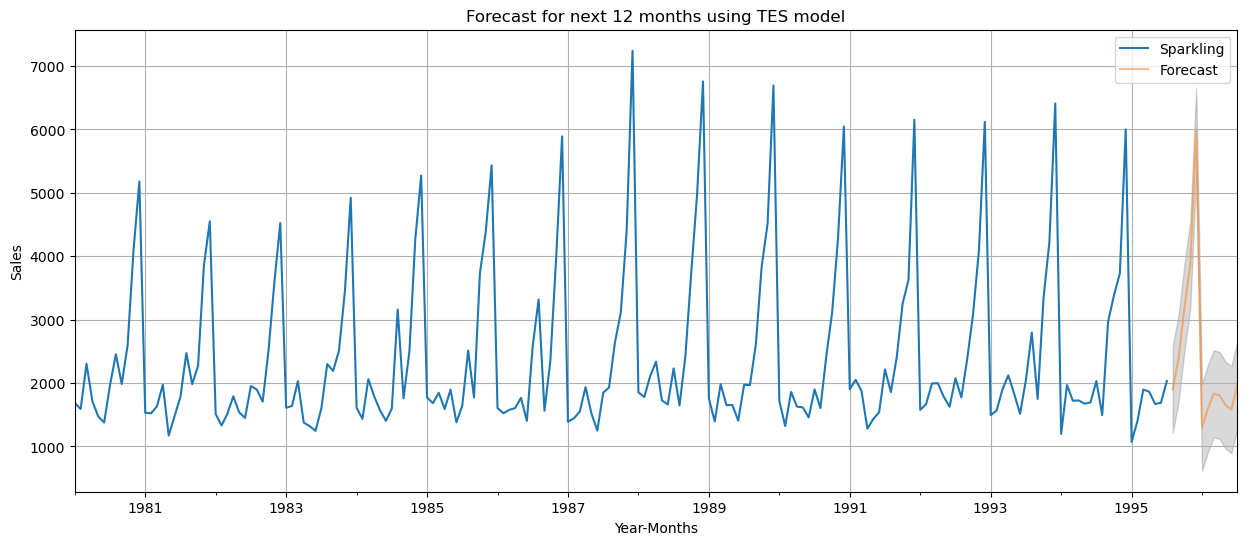

In [383]:
# plot the forecast along with the confidence band

axis = df1.plot(label='Actual', figsize=(15,6))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.title("Forecast for next 12 months using TES model")
plt.grid()
plt.show()